# Univariate detector

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hydroeval as he
from datetime import datetime, timedelta
from pytz import timezone
from streamad.util import StreamGenerator, UnivariateDS, plot
from evaluation import roc_evals #self-developed codes

In [2]:
from streamad.util import StreamGenerator, UnivariateDS, plot
from streamad.model import KNNDetector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to read sensor data
def read_sensor_data(file_path, sensor_name):
    sensor_data = pd.read_csv(file_path, index_col=0)
    sensor_data.index = pd.to_datetime(sensor_data.index)
    labels = sensor_data['2022-06-27':'2023-05-20']['class']
    
    return sensor_data, labels

# List of file paths and sensor names
sensor_files = ['../data/sensor_measurements/Sensor1_classification.csv',
                '../data/sensor_measurements/Sensor2_classification.csv',
                '../data/sensor_measurements/Sensor3_classification.csv',
                '../data/sensor_measurements/Sensor4_classification.csv',]
sensor_names = ['Sensor1', 'Sensor2','Sensor3', 'Sensor4']


## KNNCAD Detector

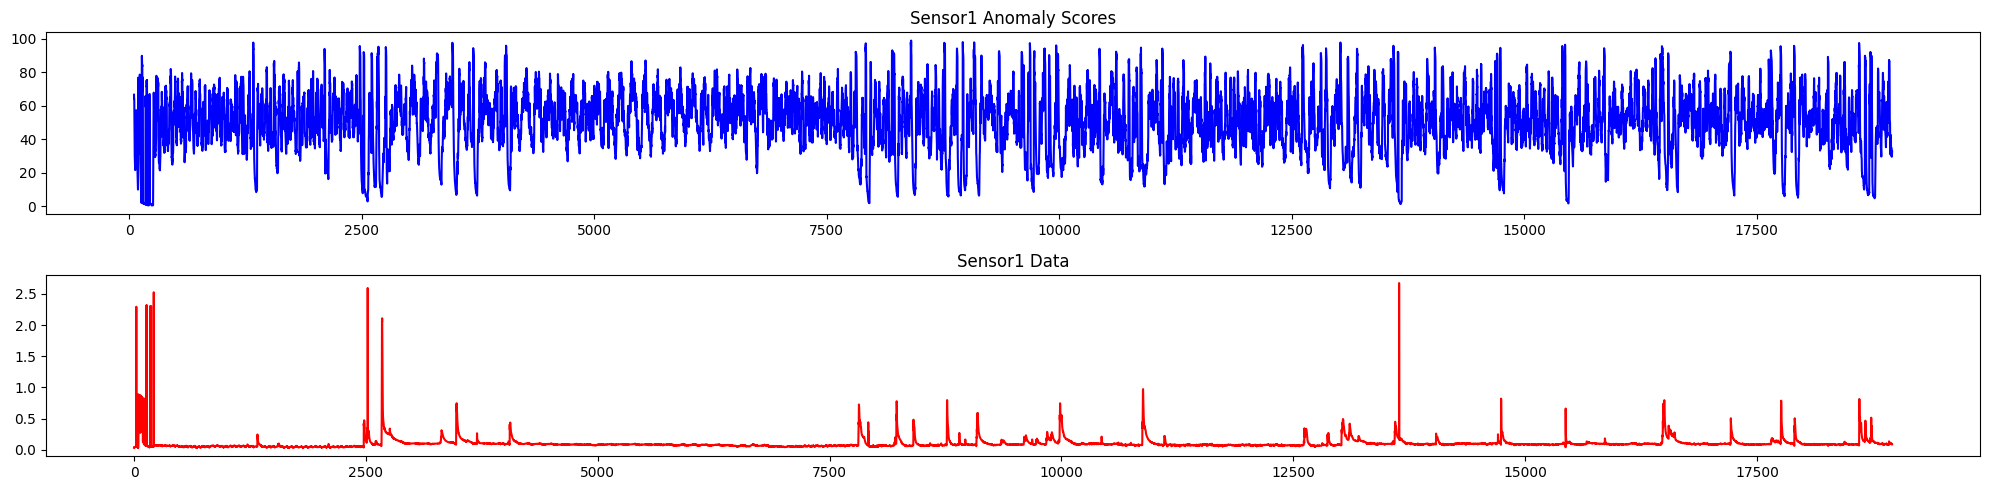

Sensor 1 ROC AUC: 0.3880421086011366


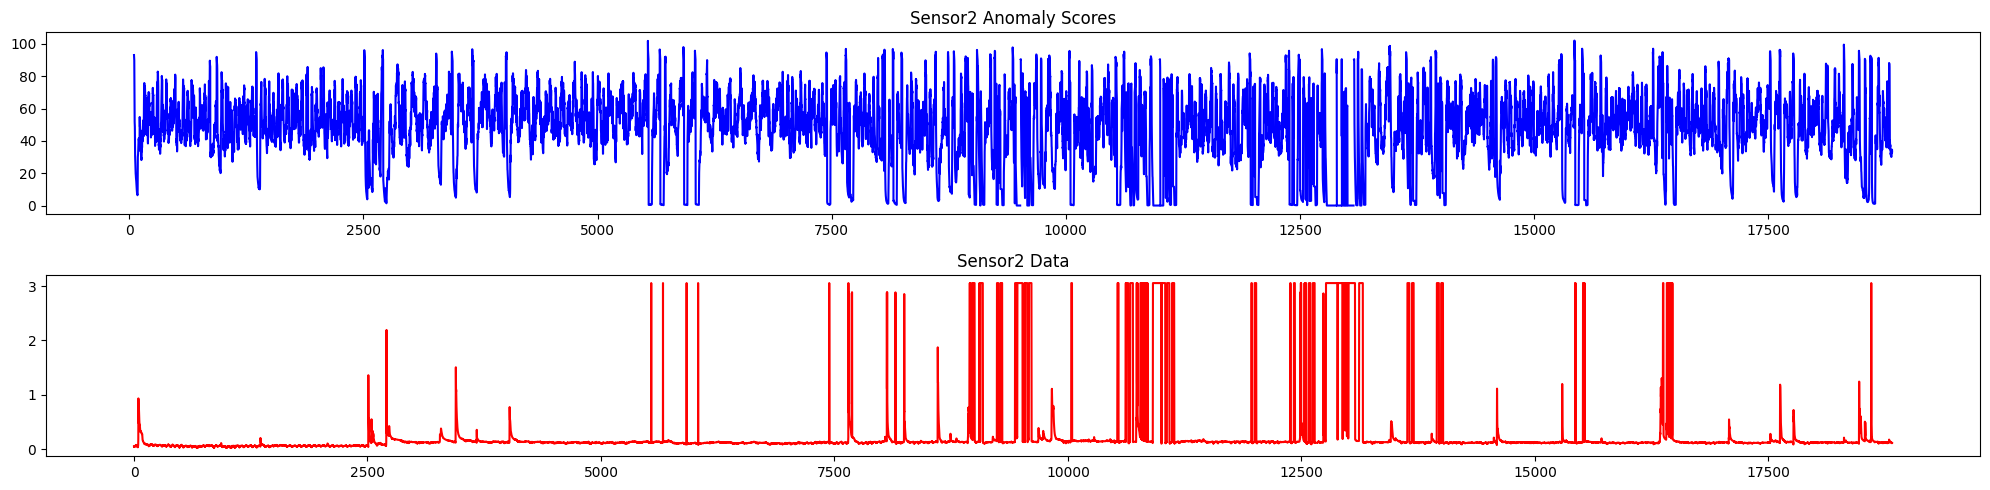

Sensor 2 ROC AUC: 0.3508366783877263


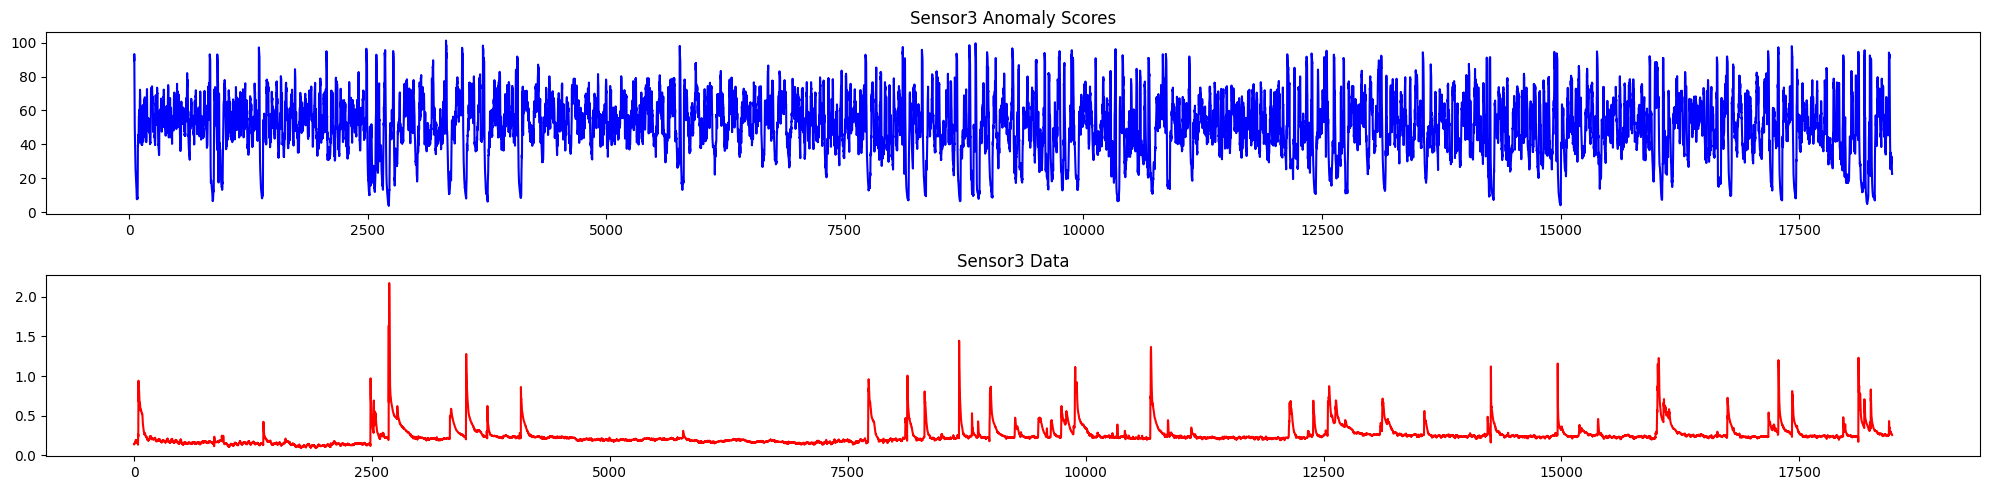

Sensor 3 ROC AUC: nan


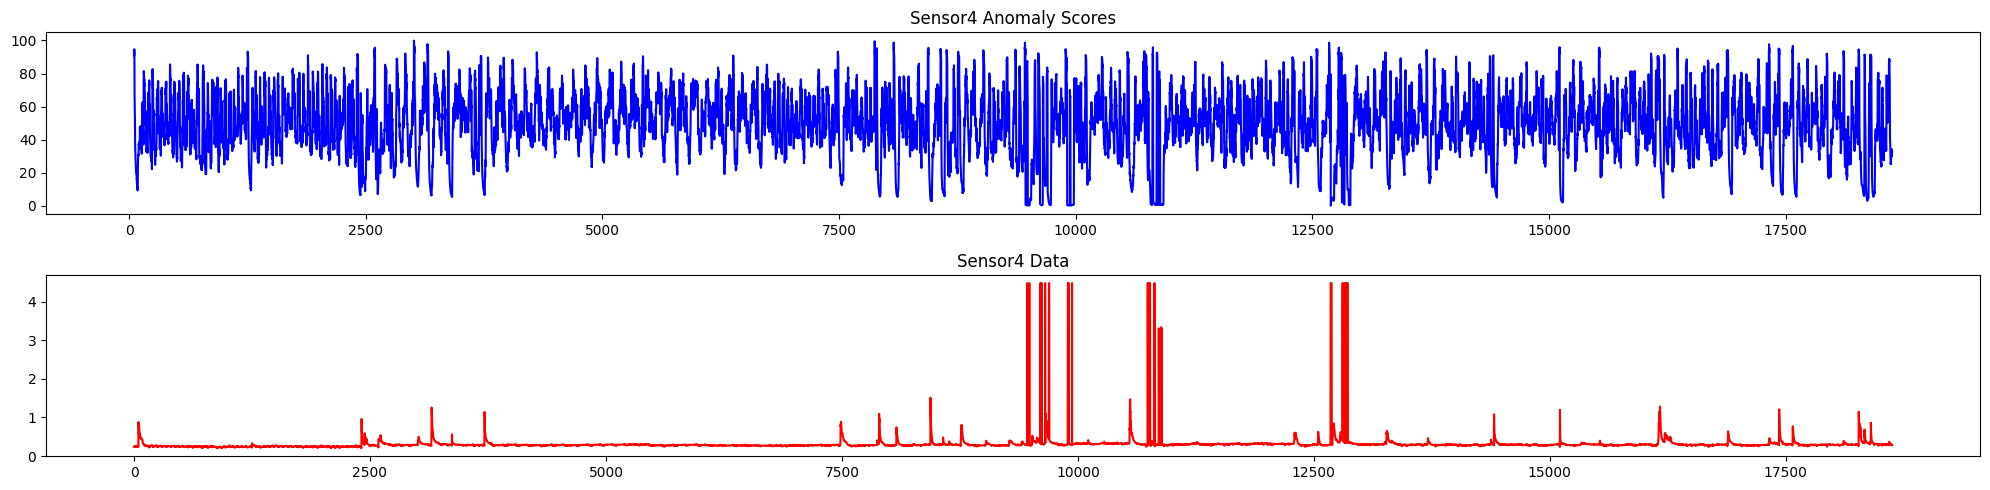

Sensor 4 ROC AUC: 0.7689813264888592


In [3]:

# Lists to store ROC values
KNN_roc_fpr_list = []
KNN_roc_tpr_list = []
KNN_roc_auc_list = []

# Loop through each sensor file and name
for i, (file_path, sensor_name) in enumerate(zip(sensor_files, sensor_names), 1):
    # Read sensor data and labels
    data, labels = read_sensor_data(file_path, sensor_name)
    data = data['2022-06-27':'2023-05-20'][sensor_name]
    data=data.values.reshape(-1, 1)

    # Evaluation of anomalies scores
    stream = StreamGenerator(data)
    model = KNNDetector(k_neighbor=20)
    scores = []

    for x in stream.iter_item():
        score = model.fit_score(x)
        scores.append(score)

    # Visualization of scores and data
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    ax[0].plot(scores, color='b')
    ax[0].set_title(f'{sensor_name} Anomaly Scores')
    ax[1].plot(data, color='r')
    ax[1].set_title(f'{sensor_name} Data')
    plt.tight_layout()
    plt.show()

    # ROC evaluation at thresholds
    thresholds = np.linspace(-1, 100, 100)
    residuals = pd.DataFrame(scores)
    roc_fpr, roc_tpr, roc_auc = roc_evals(thresholds, residuals, labels)

    # Save ROC values
    KNN_roc_fpr_list.append(roc_fpr)
    KNN_roc_tpr_list.append(roc_tpr)
    KNN_roc_auc_list.append(roc_auc)

    print(f'Sensor {i} ROC AUC: {roc_auc}')


In [4]:
# Optionally, print or use the saved ROC values for further analysis
for i, (roc_fpr, roc_tpr, roc_auc) in enumerate(zip(KNN_roc_fpr_list, KNN_roc_tpr_list, KNN_roc_auc_list), 1):
    print(f'Sensor {i} ROC AUC: {roc_auc}')

Sensor 1 ROC AUC: 0.3880421086011366
Sensor 2 ROC AUC: 0.3508366783877263
Sensor 3 ROC AUC: nan
Sensor 4 ROC AUC: 0.7689813264888592


## Spectral Residual Detector

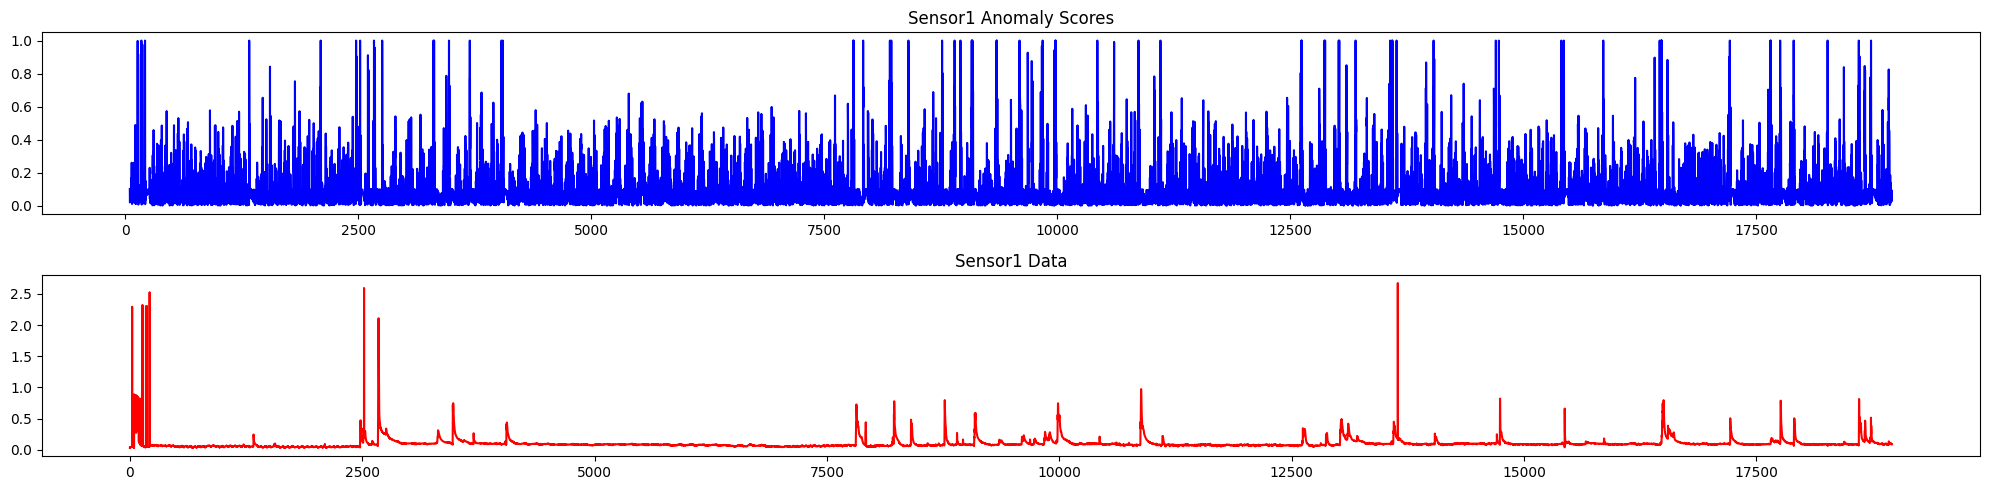

Sensor 1 ROC AUC: 0.563982097307642


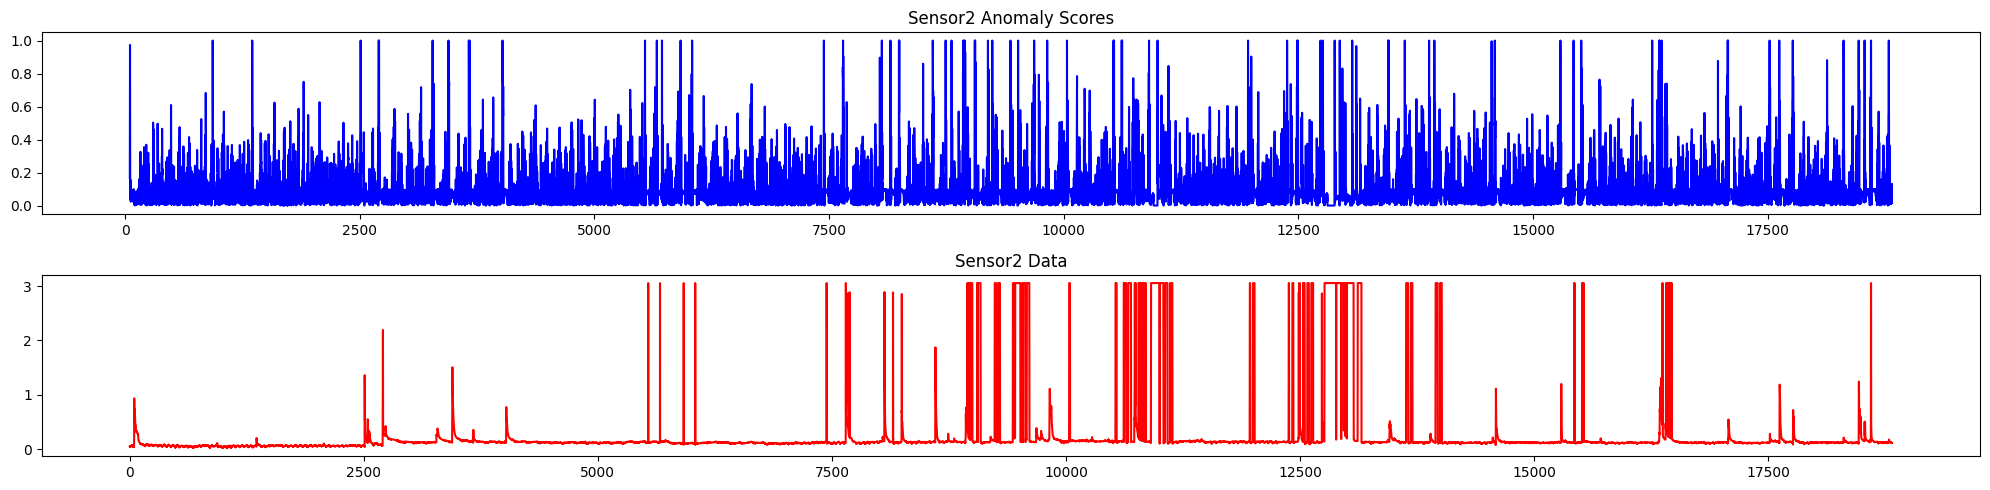

Sensor 2 ROC AUC: 0.44027435033682283


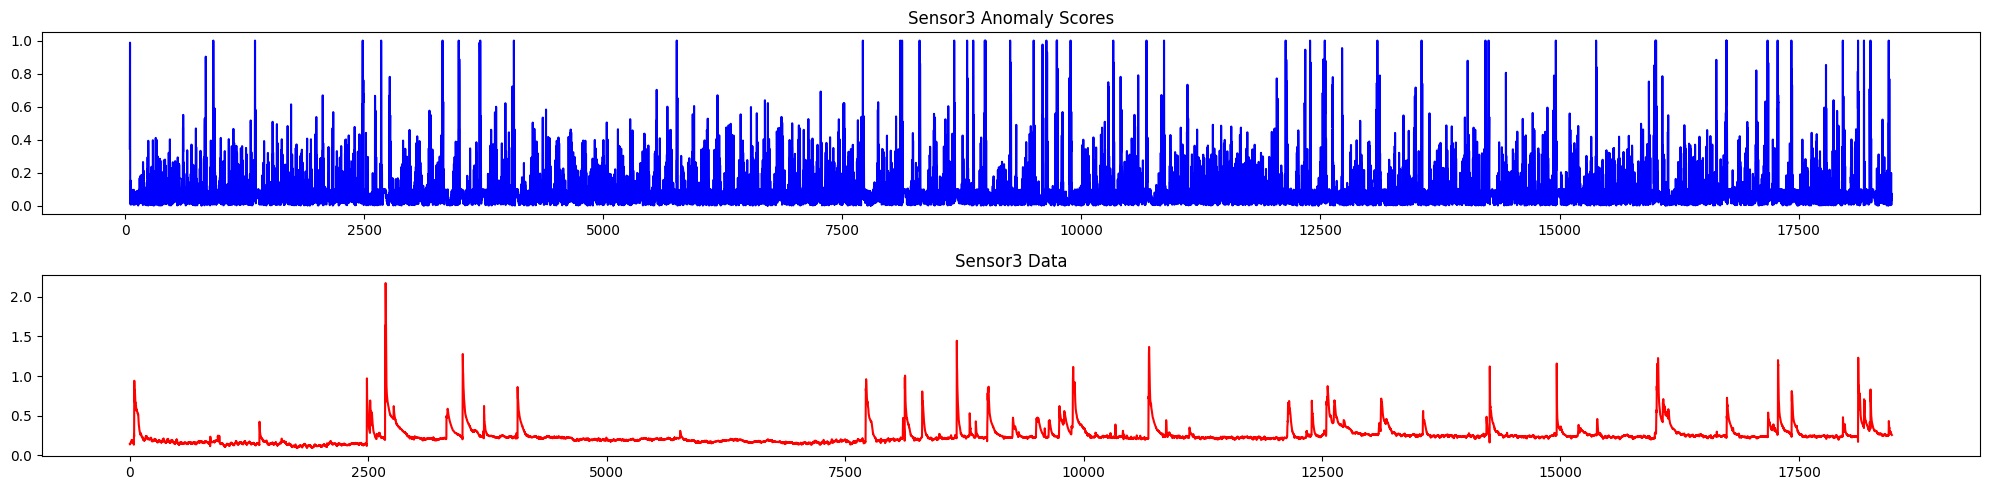

Sensor 3 ROC AUC: nan


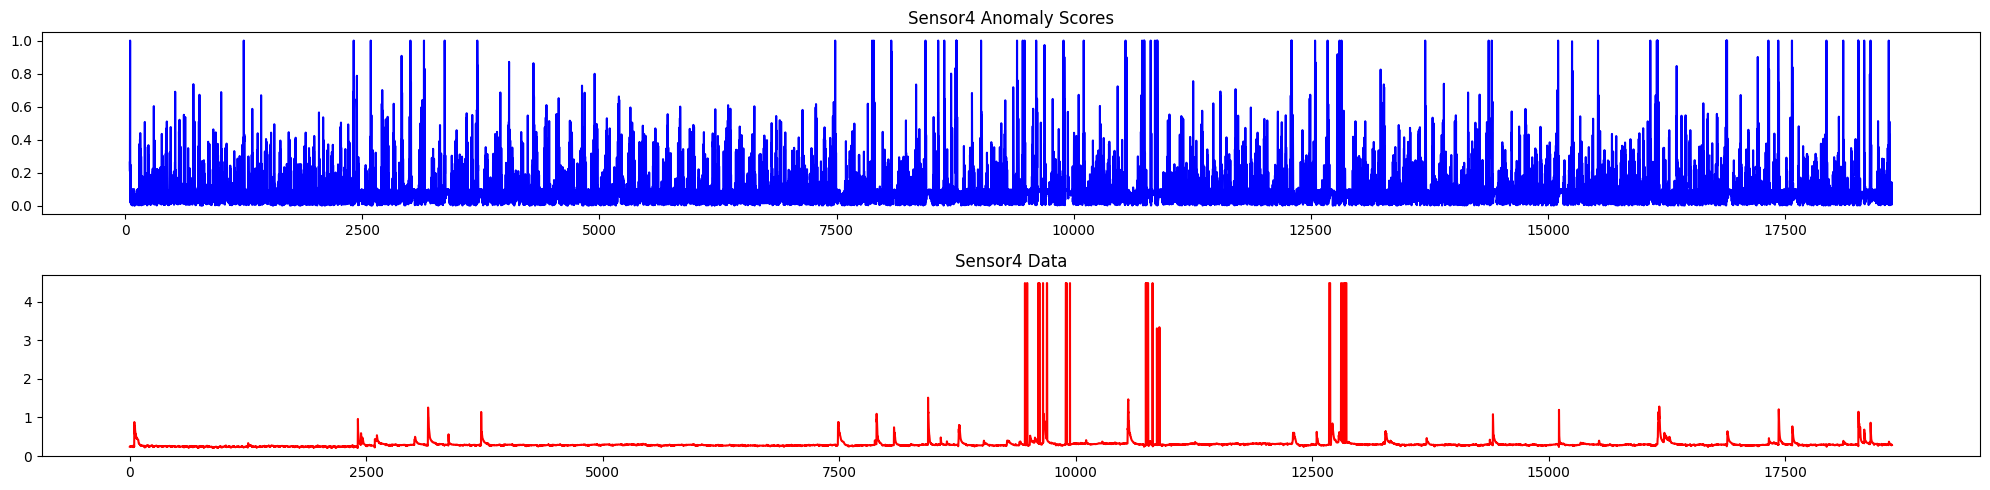

Sensor 4 ROC AUC: 0.6185157286513162


In [5]:
from streamad.util import StreamGenerator, UnivariateDS, plot
from streamad.model import SRDetector



# Lists to store ROC values
SRD_roc_fpr_list = []
SRD_roc_tpr_list = []
SRD_roc_auc_list = []

# Loop through each sensor file and name
for i, (file_path, sensor_name) in enumerate(zip(sensor_files, sensor_names), 1):
    # Read sensor data and labels
    data, labels = read_sensor_data(file_path, sensor_name)
    data = data['2022-06-27':'2023-05-20'][sensor_name]
    data=data.values.reshape(-1, 1)
    #evaluation of anomalies scores
    stream = StreamGenerator(data)
    model = SRDetector()
    scores = []

    for x in stream.iter_item():
        score = model.fit_score(x)
        scores.append(score)

    # Visualization of scores and data
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    ax[0].plot(scores, color='b')
    ax[0].set_title(f'{sensor_name} Anomaly Scores')
    ax[1].plot(data, color='r')
    ax[1].set_title(f'{sensor_name} Data')
    plt.tight_layout()
    plt.show()

    # ROC evaluation at thresholds
    thresholds = np.linspace(-5, 1, 100)
    residuals=pd.DataFrame(scores)
    roc_fpr, roc_tpr, roc_auc = roc_evals(thresholds, residuals, labels)

    # Save ROC values
    SRD_roc_fpr_list.append(roc_fpr)
    SRD_roc_tpr_list.append(roc_tpr)
    SRD_roc_auc_list.append(roc_auc)

    print(f'Sensor {i} ROC AUC: {roc_auc}')
    
    

## Z-score Detector 


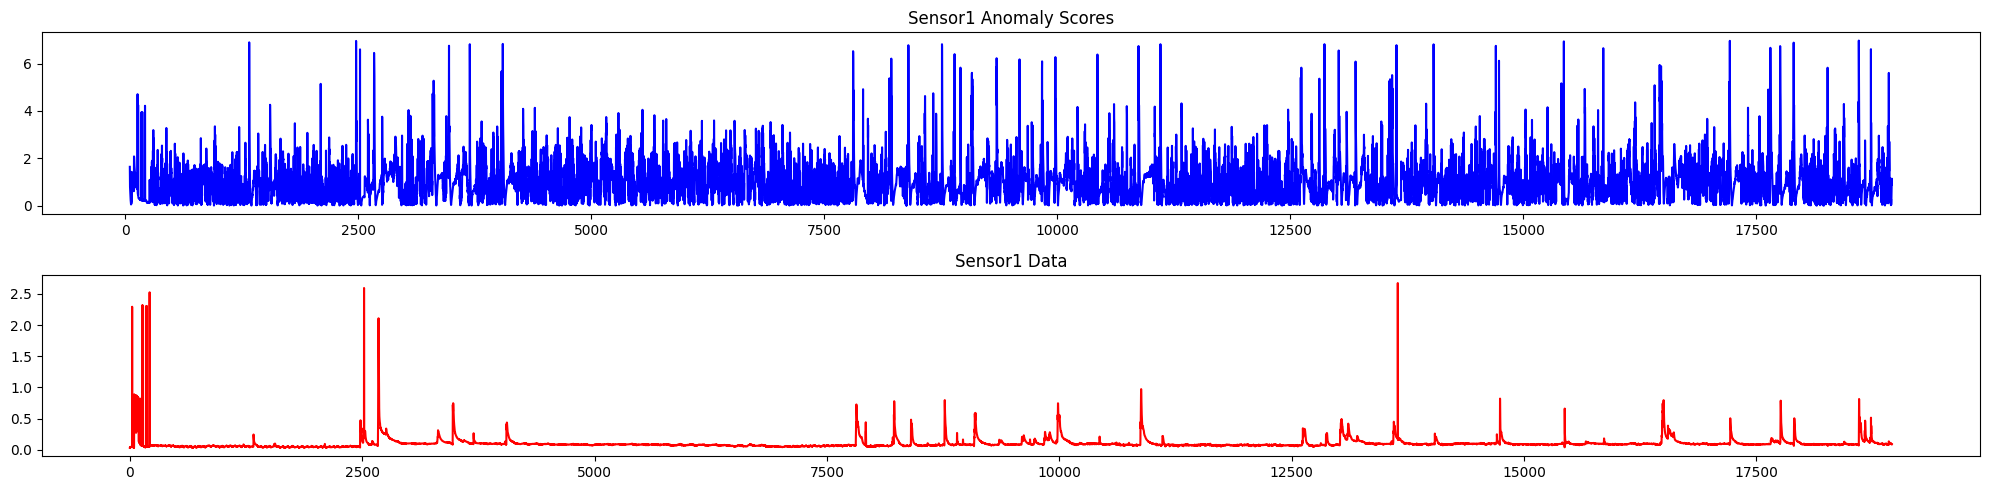

Sensor 1 ROC AUC: 0.6144738928341943


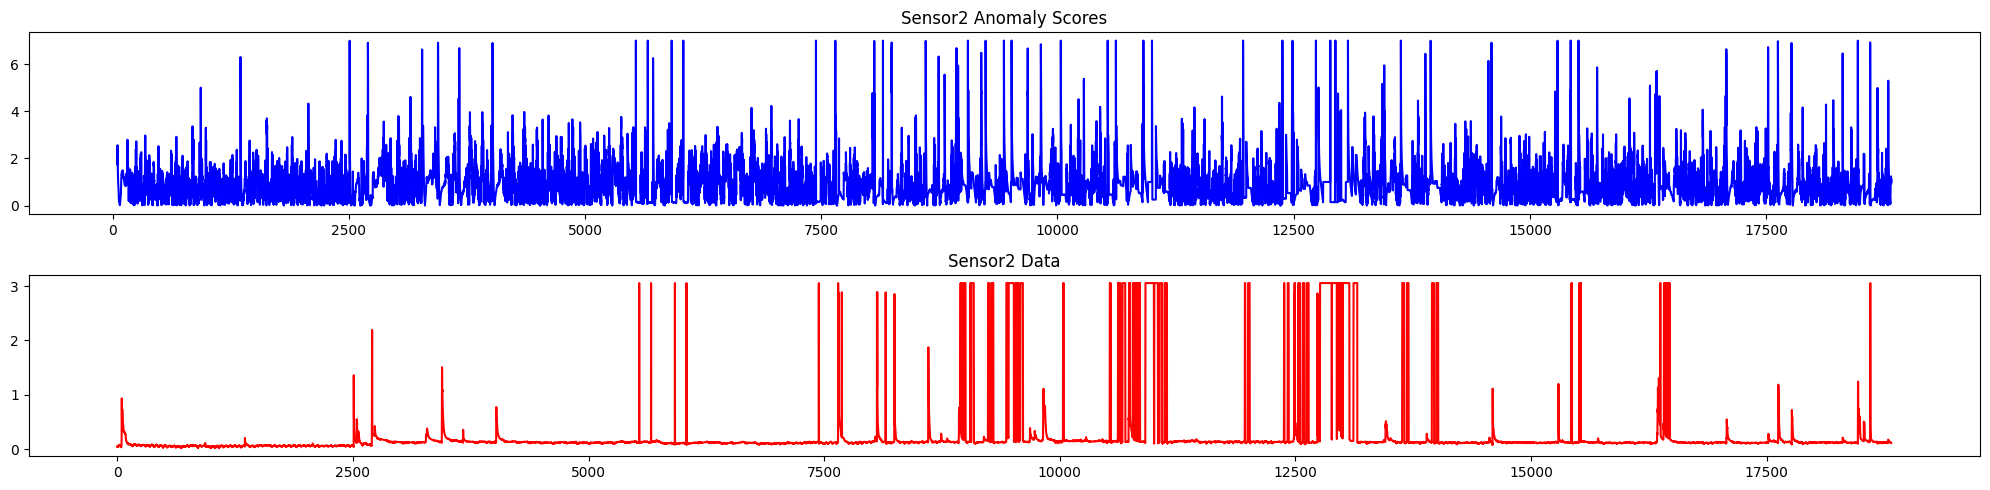

Sensor 2 ROC AUC: 0.6006839604401897


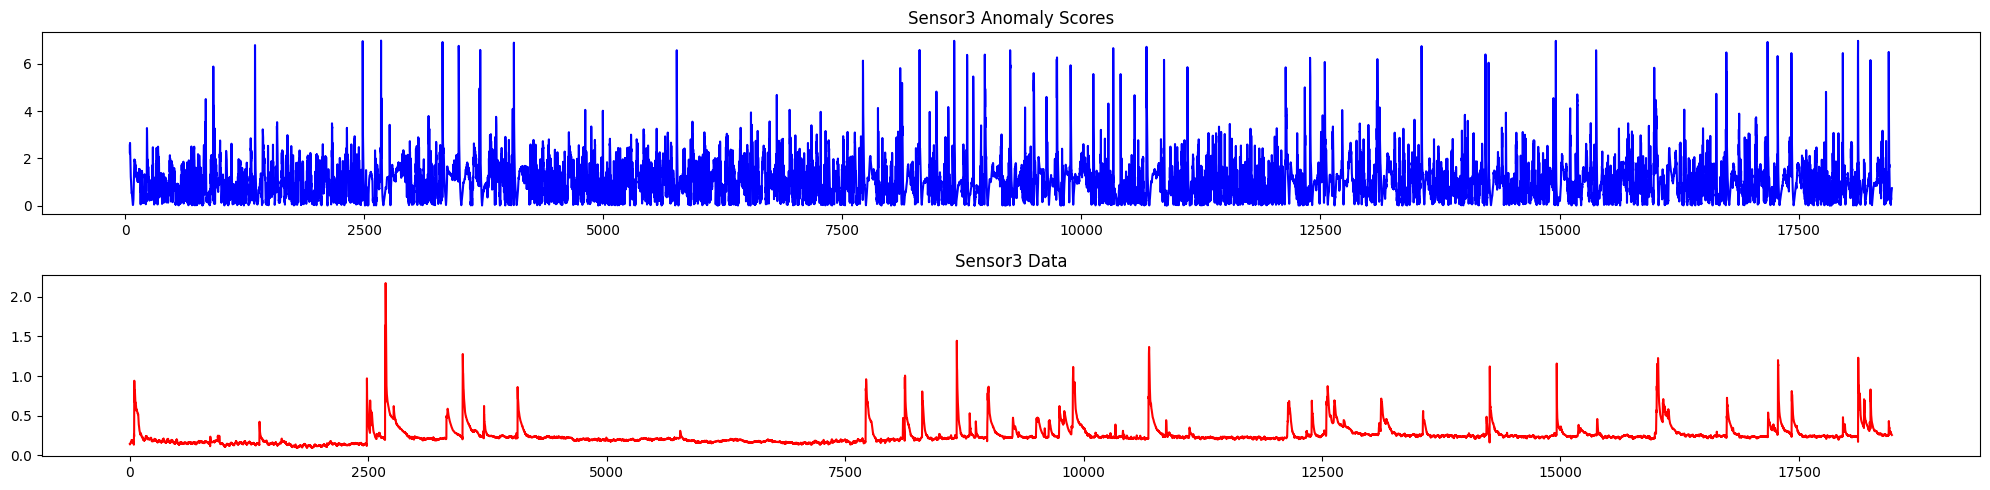

Sensor 3 ROC AUC: nan


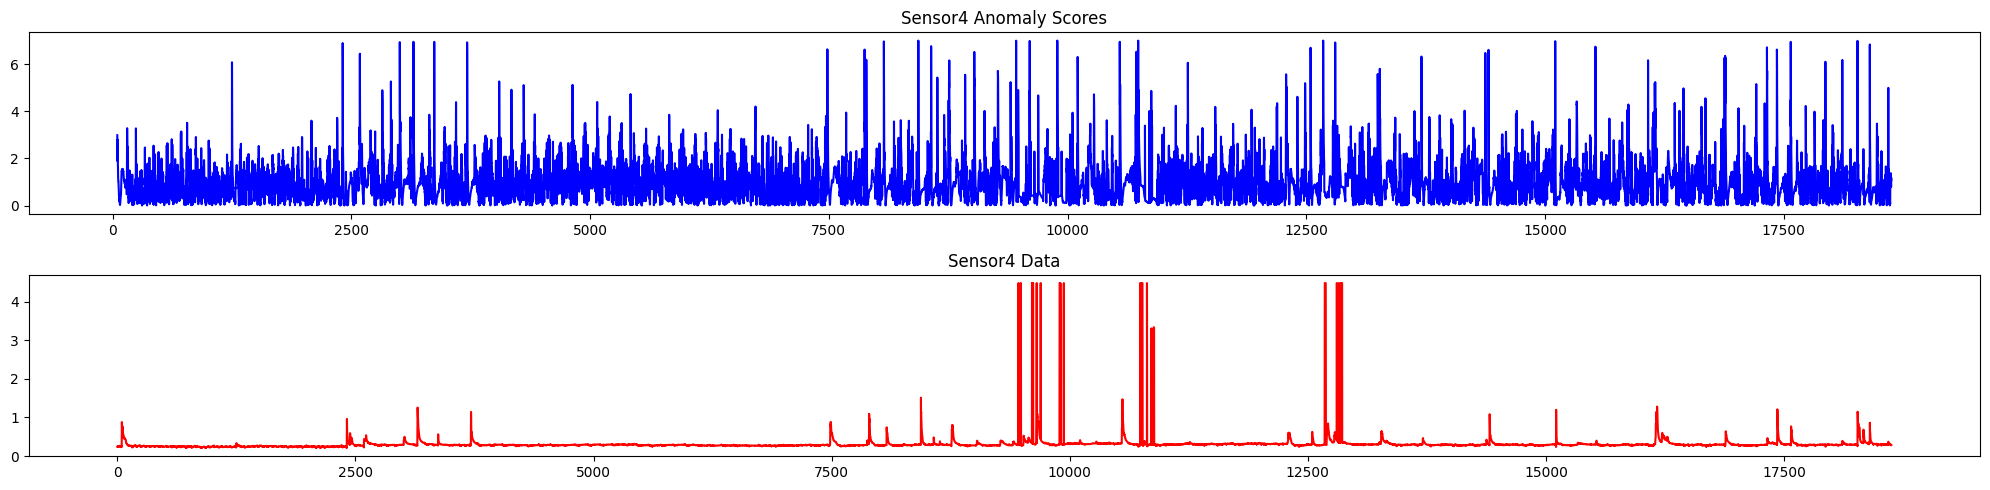

Sensor 4 ROC AUC: 0.9237699785490211


In [6]:
from streamad.util import StreamGenerator, UnivariateDS, plot
from streamad.model import ZScoreDetector



# Lists to store ROC values
Z_roc_fpr_list = []
Z_roc_tpr_list = []
Z_roc_auc_list = []

# Loop through each sensor file and name
for i, (file_path, sensor_name) in enumerate(zip(sensor_files, sensor_names), 1):
    # Read sensor data and labels
    data, labels = read_sensor_data(file_path, sensor_name)
    data = data['2022-06-27':'2023-05-20'][sensor_name]
    data=data.values.reshape(-1, 1)
    #evaluation of anomalies scores
    stream = StreamGenerator(data)
    model = ZScoreDetector()
    scores = []
    
    for x in stream.iter_item():
        score = model.fit_score(x)
        scores.append(score)

    # Visualization of scores and data
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    ax[0].plot(scores, color='b')
    ax[0].set_title(f'{sensor_name} Anomaly Scores')
    ax[1].plot(data, color='r')
    ax[1].set_title(f'{sensor_name} Data')
    plt.tight_layout()
    plt.show()

    # ROC evaluation at thresholds
    thresholds = np.linspace(0, 10, 50)
    residuals=pd.DataFrame(scores)
    roc_fpr, roc_tpr, roc_auc = roc_evals(thresholds, residuals, labels)

    # Save ROC values
    Z_roc_fpr_list.append(roc_fpr)
    Z_roc_tpr_list.append(roc_tpr)
    Z_roc_auc_list.append(roc_auc)

    print(f'Sensor {i} ROC AUC: {roc_auc}')
    


## One-class SVM Detector

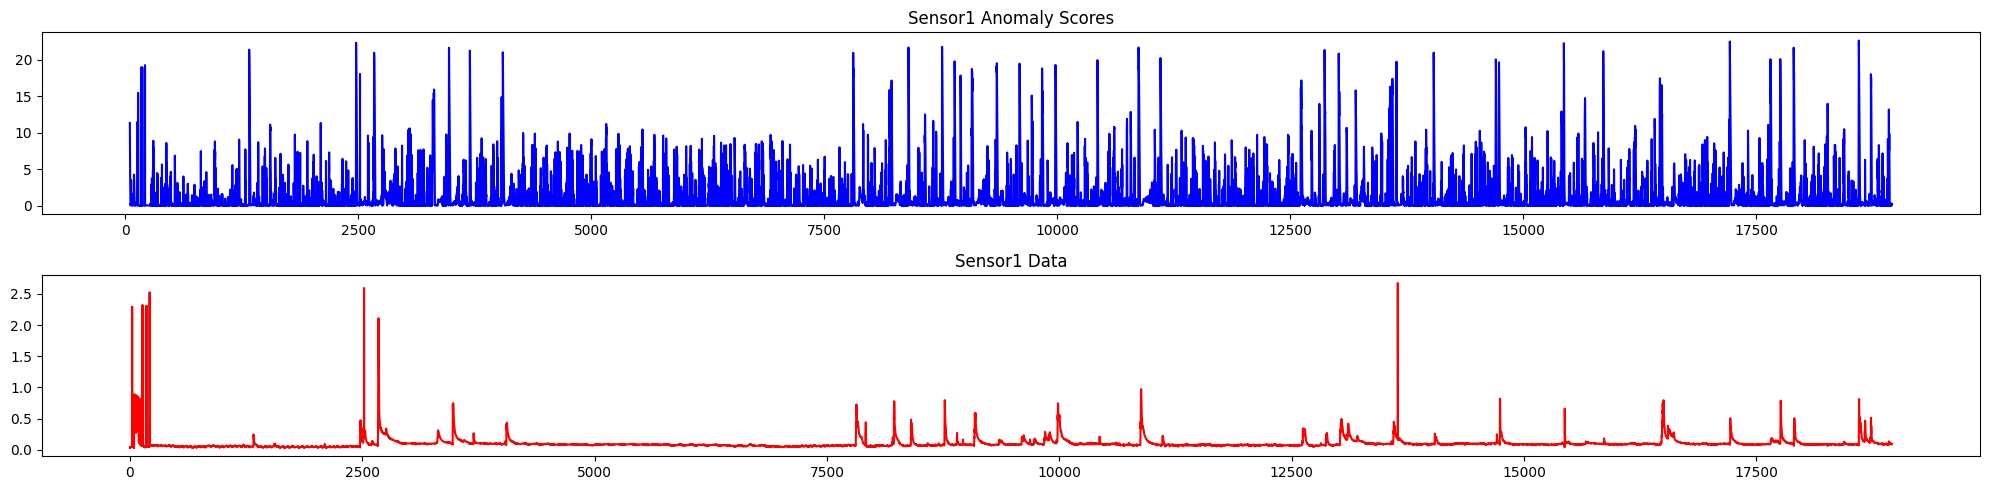

Sensor 1 ROC AUC: 0.5289757412398922


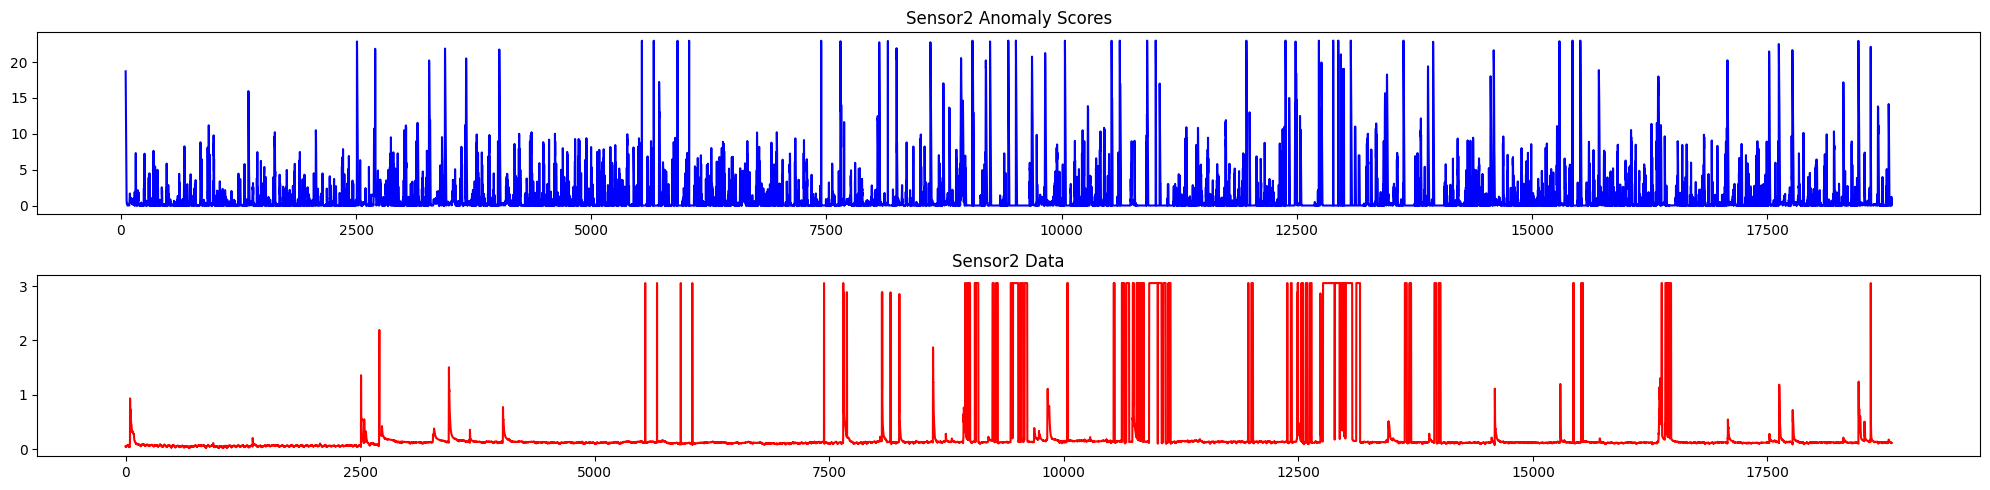

Sensor 2 ROC AUC: 0.5490422836403187


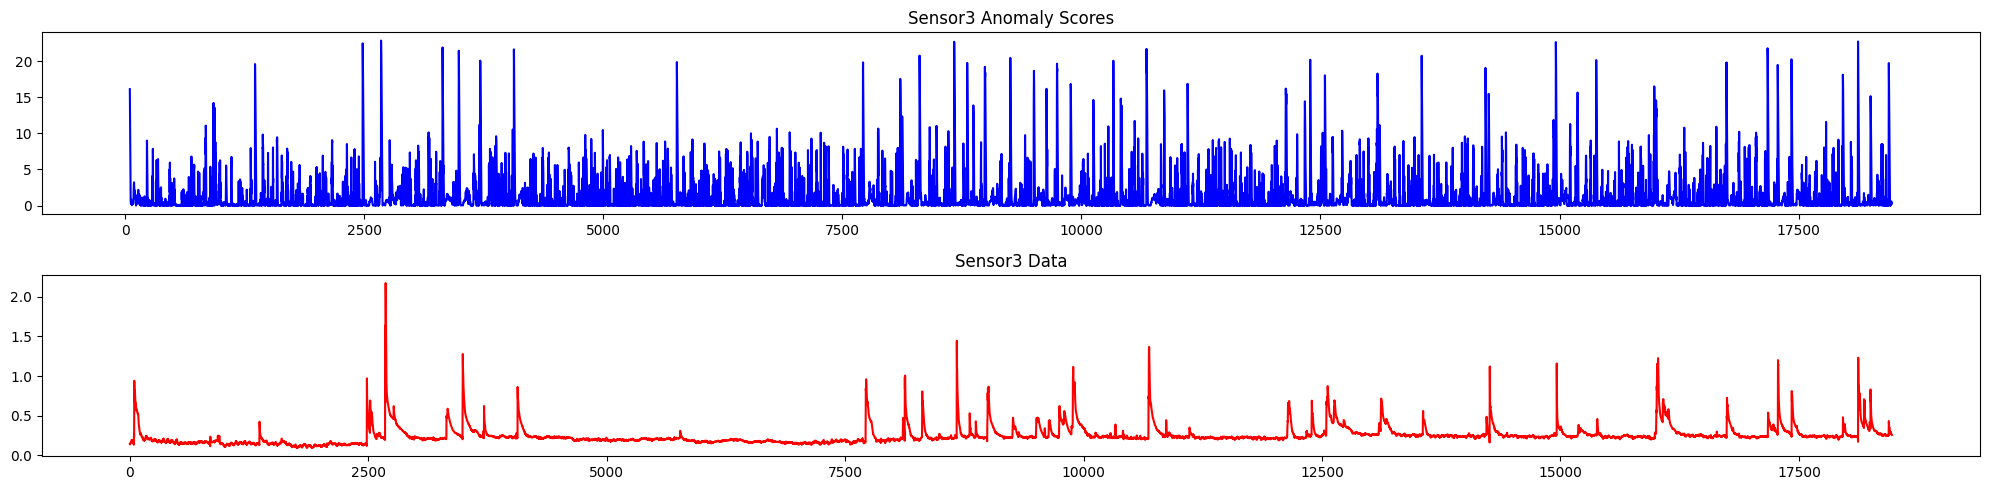

Sensor 3 ROC AUC: nan


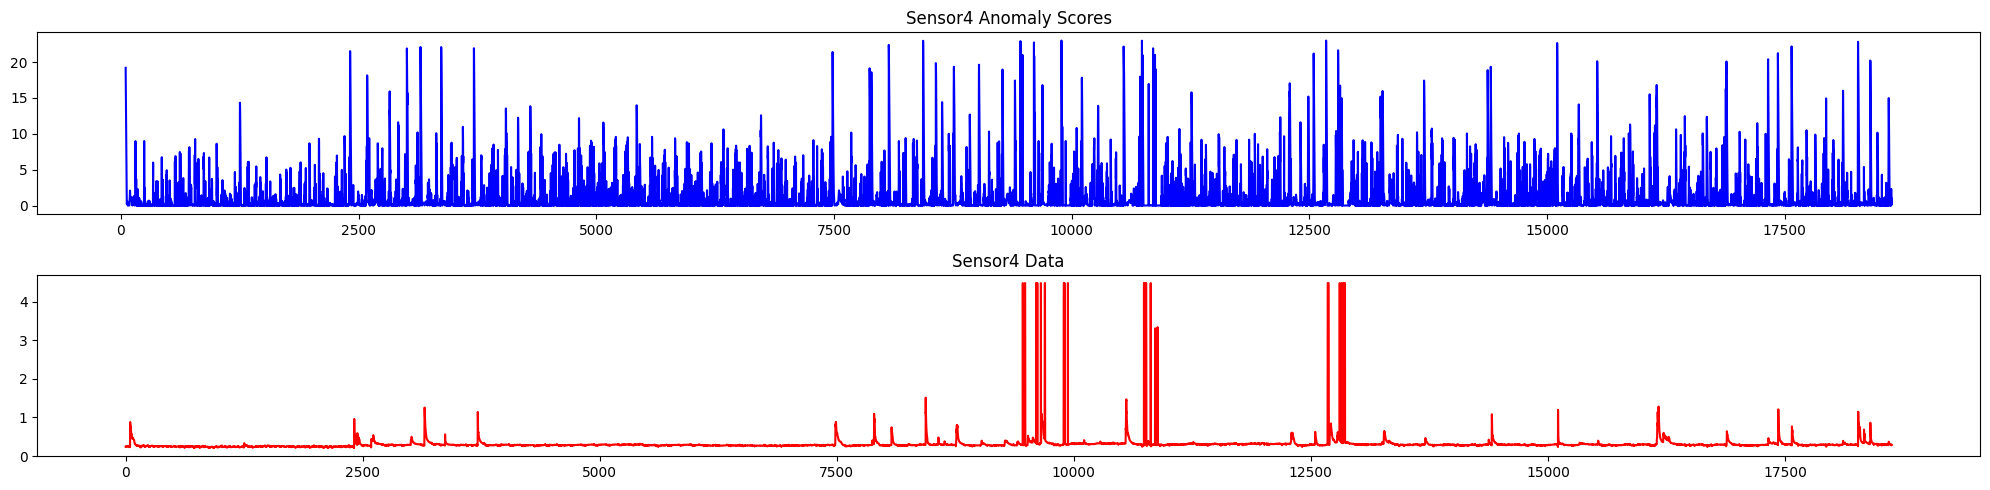

Sensor 4 ROC AUC: 0.8372112487445598


In [7]:
from streamad.util import StreamGenerator, UnivariateDS, plot
from streamad.model import OCSVMDetector

# Lists to store ROC values
SVM_roc_fpr_list = []
SVM_roc_tpr_list = []
SVM_roc_auc_list = []

# Loop through each sensor file and name
for i, (file_path, sensor_name) in enumerate(zip(sensor_files, sensor_names), 1):
    # Read sensor data and labels
    data, labels = read_sensor_data(file_path, sensor_name)
    data = data['2022-06-27':'2023-05-20'][sensor_name]
    data=data.values.reshape(-1, 1)
    #evaluation of anomalies scores
    stream = StreamGenerator(data)
    model = OCSVMDetector()
    scores = []

    
    for x in stream.iter_item():
        score = model.fit_score(x)
        scores.append(score)

    # Visualization of scores and data
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    ax[0].plot(scores, color='b')
    ax[0].set_title(f'{sensor_name} Anomaly Scores')
    ax[1].plot(data, color='r')
    ax[1].set_title(f'{sensor_name} Data')
    plt.tight_layout()
    plt.show()

    # ROC evaluation at thresholds
    thresholds = np.linspace(-5, 30, 10)
    residuals=pd.DataFrame(scores)
    roc_fpr, roc_tpr, roc_auc = roc_evals(thresholds, residuals, labels)

    # Save ROC values
    SVM_roc_fpr_list.append(roc_fpr)
    SVM_roc_tpr_list.append(roc_tpr)
    SVM_roc_auc_list.append(roc_auc)

    print(f'Sensor {i} ROC AUC: {roc_auc}')
    

## RRCF

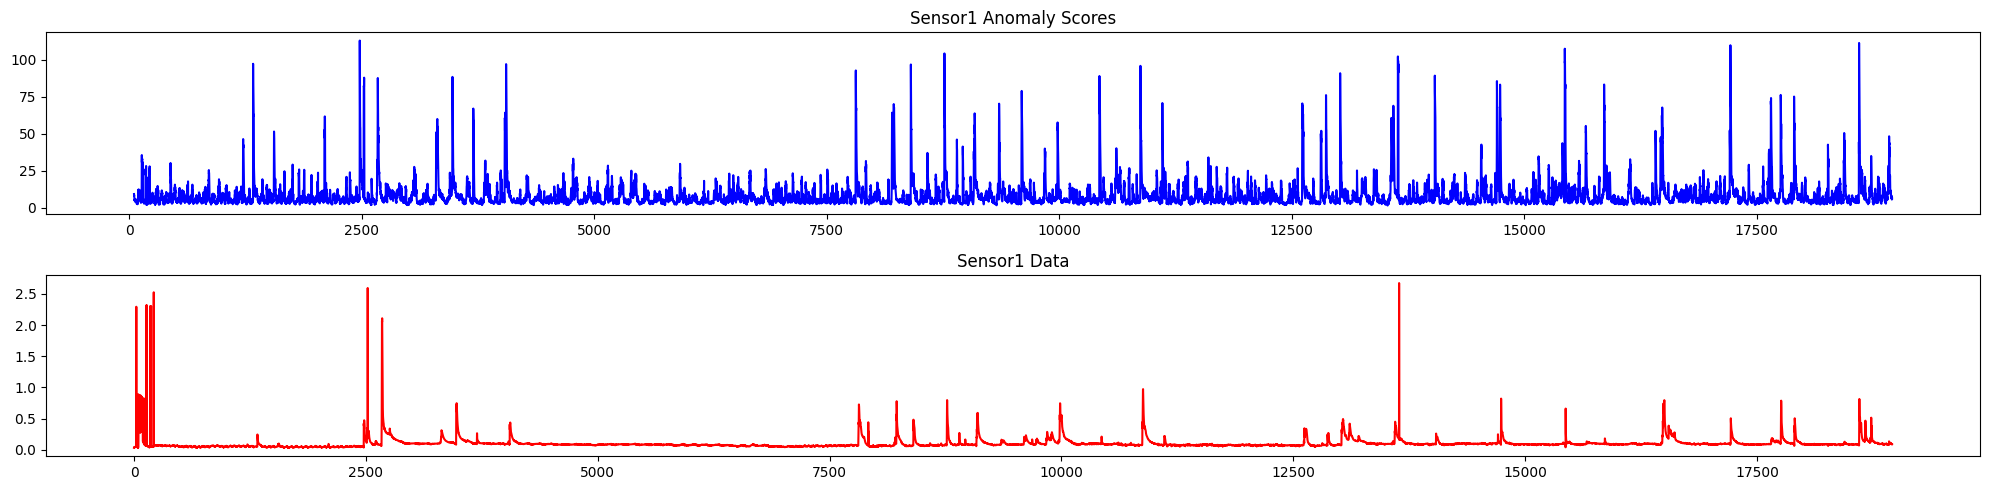

Sensor 1 ROC AUC: 0.3232046542549492


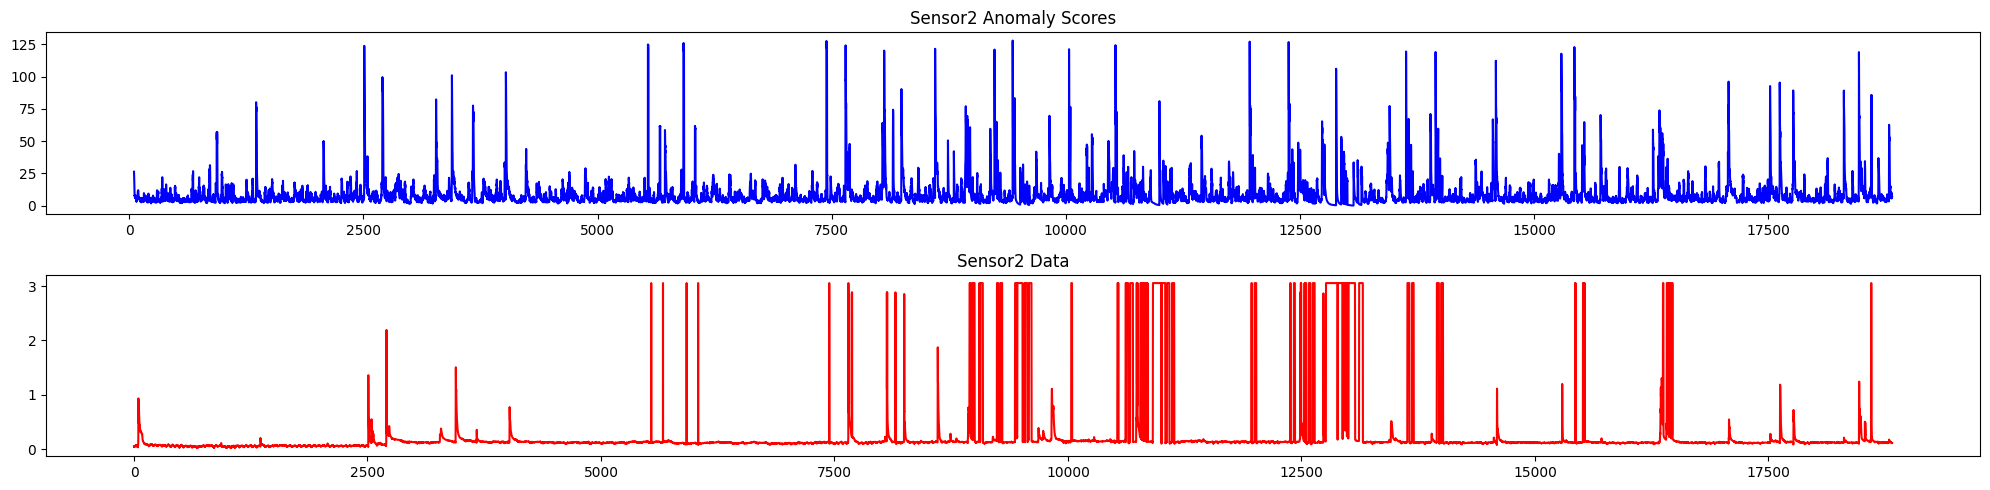

Sensor 2 ROC AUC: 0.39004253786171017


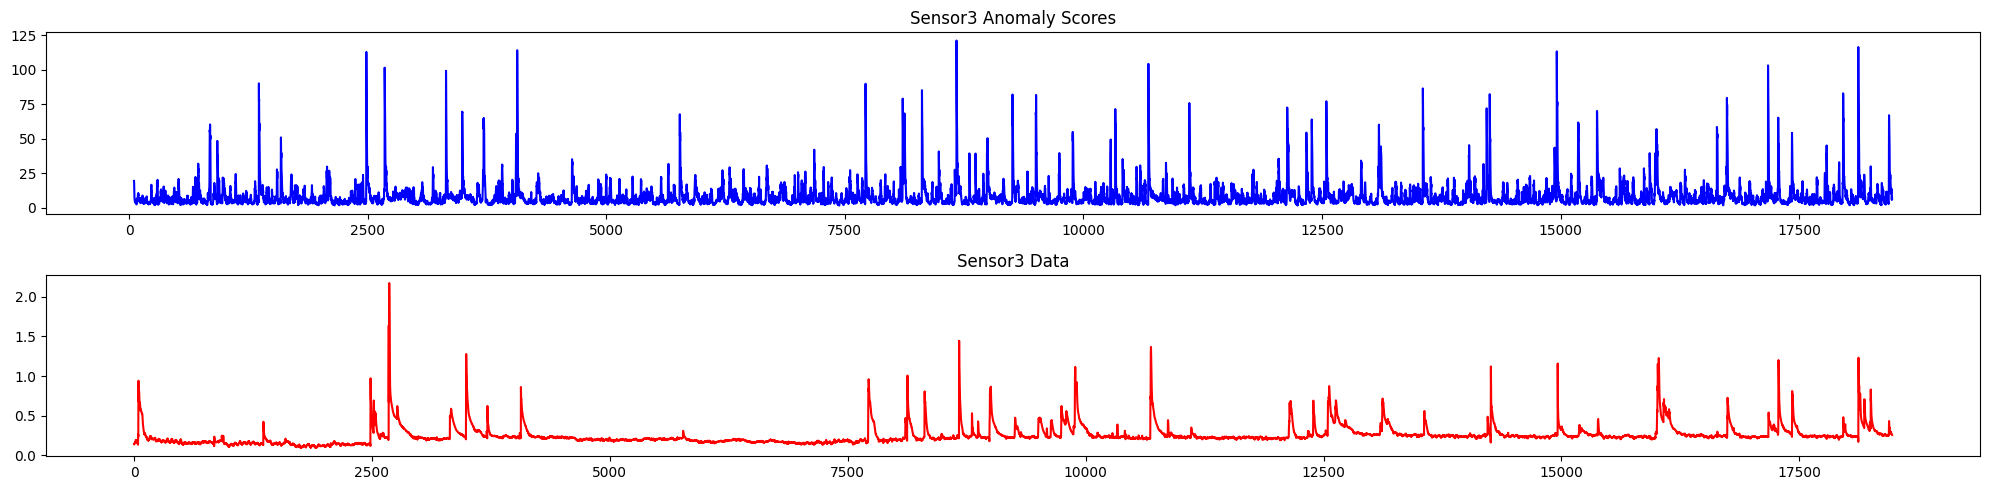

Sensor 3 ROC AUC: nan


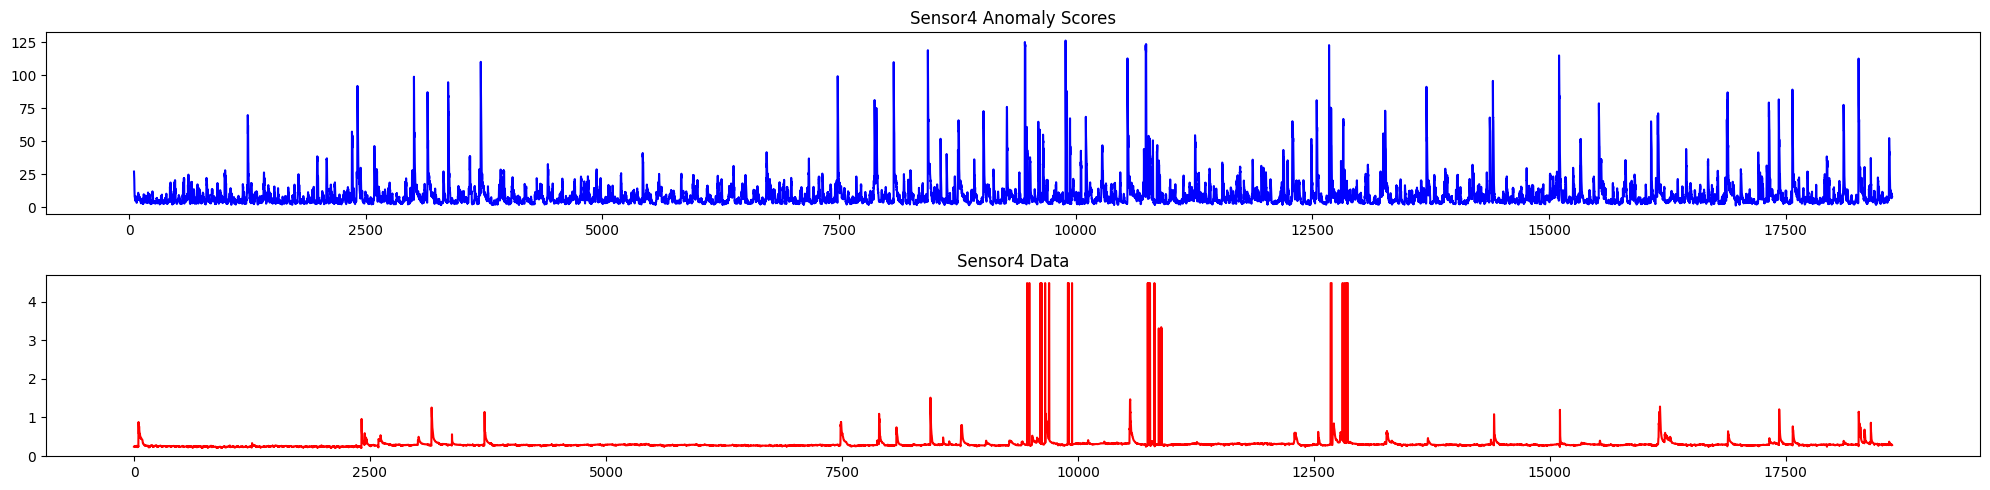

Sensor 4 ROC AUC: 0.8828875745514515


In [8]:
from streamad.util import StreamGenerator, UnivariateDS, plot
from streamad.model import RrcfDetector

# Lists to store ROC values
RRCF_roc_fpr_list = []
RRCF_roc_tpr_list = []
RRCF_roc_auc_list = []

# Loop through each sensor file and name
for i, (file_path, sensor_name) in enumerate(zip(sensor_files, sensor_names), 1):
    # Read sensor data and labels
    data, labels = read_sensor_data(file_path, sensor_name)
    data = data['2022-06-27':'2023-05-20'][sensor_name]
    data=data.values.reshape(-1, 1)
    #evaluation of anomalies scores
    stream = StreamGenerator(data)
    model = RrcfDetector(num_trees=100, tree_size=128,window_len=50)
    scores = []

    
    for x in stream.iter_item():
        score = model.fit_score(x)
        scores.append(score)

    # Visualization of scores and data
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    ax[0].plot(scores, color='b')
    ax[0].set_title(f'{sensor_name} Anomaly Scores')
    ax[1].plot(data, color='r')
    ax[1].set_title(f'{sensor_name} Data')
    plt.tight_layout()
    plt.show()

    # ROC evaluation at thresholds
    thresholds = np.linspace(-5, 200, 2000)
    residuals=pd.DataFrame(scores)
    roc_fpr, roc_tpr, roc_auc = roc_evals(thresholds, residuals, labels)

    # Save ROC values
    RRCF_roc_fpr_list.append(roc_fpr)
    RRCF_roc_tpr_list.append(roc_tpr)
    RRCF_roc_auc_list.append(roc_auc)

    print(f'Sensor {i} ROC AUC: {roc_auc}')
    
    

# Kalman Filter 

In [9]:

# Sensor locations
superjunction_loc = ['J_WLR16_32ND', 'J_WLR18_COMB_HEMP', 'J_WLR19_23RD', 'J_WLR20_TRINITY']


# Lists to store ROC values
KF_roc_fpr_list = []
KF_roc_tpr_list = []
KF_roc_auc_list = []

#Upload residuals of kf (anomalies scores)
for i, (file_path, sensor_name,loc) in enumerate(zip(sensor_files, sensor_names,superjunction_loc), 1):
    residuals=pd.read_csv('../result/digital_twin_model_result/residual_kf_gauge.csv',index_col=[0])['2022-06-27':'2023-05-20']
    residuals.index=pd.to_datetime(residuals.index)

    # Read sensor data and labels
    data, labels = read_sensor_data(file_path, sensor_name)
    
    residuals=residuals[loc].resample('5min').mean().interpolate(method='nearest')
    #Set labels of kf 
    measurements=data.resample('5min').mean().interpolate(method='nearest')
    
    data=(data.iloc[data.index.get_indexer(measurements.index, method='nearest')]
                         .set_index(measurements.index))
    
    labels=data[residuals.index[0]:residuals.index[-1]]['class']
    residuals=residuals[labels.index[0]:labels.index[-1]]
    
    
    # ROC evaluation at thresholds
    thresholds = np.linspace(-3, 19, 800)
    roc_fpr, roc_tpr, roc_auc = roc_evals(thresholds, residuals, labels)
    
    # Save ROC values
    KF_roc_fpr_list.append(roc_fpr)
    KF_roc_tpr_list.append(roc_tpr)
    KF_roc_auc_list.append(roc_auc)


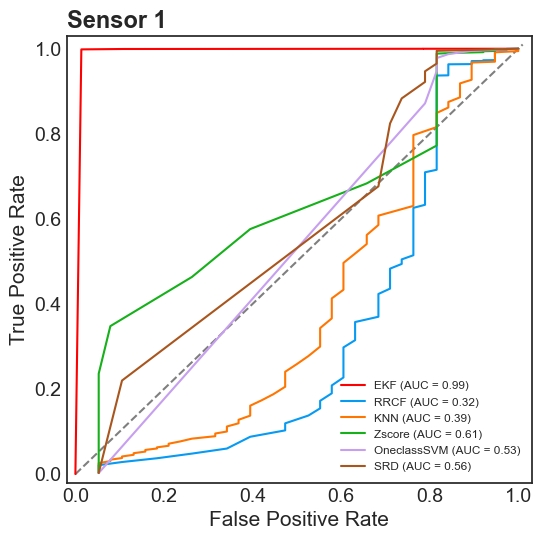

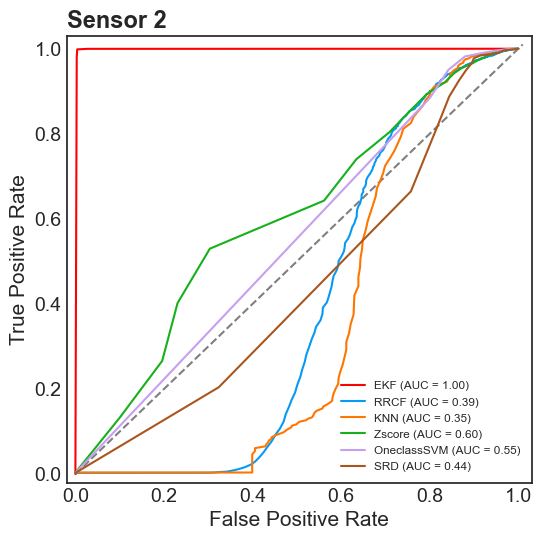

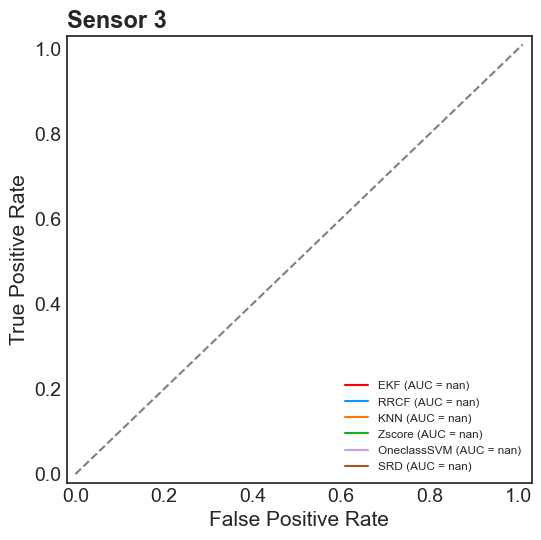

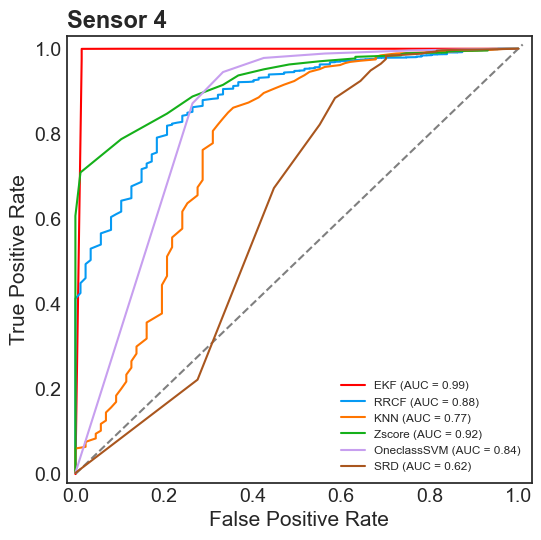

In [10]:


for i in range(len(superjunction_loc)):
    SVM_roc_fpr,SVM_roc_tpr,SVM_auc=SVM_roc_fpr_list[i],SVM_roc_tpr_list[i],SVM_roc_auc_list[i]
    RRCF_roc_fpr,RRCF_roc_tpr,RRCF_auc=RRCF_roc_fpr_list[i],RRCF_roc_tpr_list[i],RRCF_roc_auc_list[i]
    SRD_roc_fpr,SRD_roc_tpr,SRD_auc=SRD_roc_fpr_list[i],SRD_roc_tpr_list[i],SRD_roc_auc_list[i]
    Z_roc_fpr,Z_roc_tpr,Z_auc=Z_roc_fpr_list[i],Z_roc_tpr_list[i],Z_roc_auc_list[i]
    KNN_roc_fpr,KNN_roc_tpr,KNN_auc=KNN_roc_fpr_list[i],KNN_roc_tpr_list[i],KNN_roc_auc_list[i]
    KF_roc_fpr,KF_roc_tpr,KF_auc=KF_roc_fpr_list[i],KF_roc_tpr_list[i],KF_roc_auc_list[i]

    plt.rcParams.update({'font.size': 14})
    plt.figure( figsize=(6, 5.8))
    plt.style.use('seaborn-v0_8-white')
    # ROC Curve plot
    plt.plot(KF_roc_fpr, KF_roc_tpr, color='red', label='EKF (AUC = %0.2f)' % KF_auc)
    plt.plot(RRCF_roc_fpr, RRCF_roc_tpr, color='#069AF3',label='RRCF (AUC = %0.2f)' % RRCF_auc)
    plt.plot(KNN_roc_fpr, KNN_roc_tpr,color='#FF7500', label='KNN (AUC = %0.2f)' % KNN_auc)
    plt.plot(Z_roc_fpr, Z_roc_tpr, color='#15B01A',label='Zscore (AUC = %0.2f)' % Z_auc)
    plt.plot(SVM_roc_fpr, SVM_roc_tpr, color='#C79FEF', label='OneclassSVM (AUC = %0.2f)' % SVM_auc)
    plt.plot(SRD_roc_fpr, SRD_roc_tpr, color='#A9561E', label='SRD (AUC = %0.2f)' % SRD_auc)

    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.title(f'Sensor {i+1}', fontsize=17, loc='left', fontweight='bold')
    plt.ylim(-0.02, 1.03)
    plt.xlim(-0.02, 1.03)
    plt.plot([0, 1.01], [0, 1.01], linestyle='--', c='k', zorder=-1, alpha=0.5)
    plt.legend(fontsize=8.5, loc='lower right')
    # Show the plots
    plt.show()
    
    # To save the data
    auc_values = [KF_auc, RRCF_auc, KNN_auc, Z_auc, SVM_auc, SRD_auc]
    data = {
        'KF_roc_fpr': KF_roc_fpr,
        'KF_roc_tpr': KF_roc_tpr,
        'RRCF_roc_fpr': RRCF_roc_fpr,
        'RRCF_roc_tpr': RRCF_roc_tpr,
        'KNN_roc_fpr':KNN_roc_fpr,
        'KNN_roc_tpr':KNN_roc_tpr,
        'Z_roc_fpr':Z_roc_fpr,
        'Z_roc_tpr':Z_roc_tpr,
        'SVM_roc_fpr':SVM_roc_fpr,
        'SVM_roc_tpr':SVM_roc_tpr,
        'SRD_roc_fpr':SRD_roc_fpr,
        'SRD_roc_tpr':SRD_roc_tpr,
        'auc_values':auc_values

    }

    # Create a list of lists where each sublist represents the data for a column
    columns_data = [data[key] for key in data]

    # Create DataFrame from the list of lists
    df = pd.DataFrame(columns_data).T

    # Rename the columns
    df.columns = data.keys()
    
    # Save DataFrame to CSV
    filename = f'../result/digital_twin_model_result/roc_data_sensor{i+1}.csv'
    df.to_csv(filename, index=False)



    